<a href="https://colab.research.google.com/github/Ashish-Tripathy/ComputerVision/blob/master/1st_DNN_14th_May.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:

import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

from keras.models import Model
from keras.layers import Input,Conv2D, BatchNormalization,Activation, Flatten
from keras.callbacks import *


In [12]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


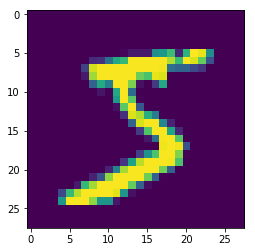

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# Building the Model Architecture

In [11]:

input = Input(shape=(28, 28, 1,))

#defining convolution block
def conv_block(inputs, filters,padding = 'valid'):
  conv = Conv2D(filters = filters, kernel_size = (3,3), padding=padding, use_bias=False)(inputs)
  conv = Dropout(0.2)(conv)
  conv = BatchNormalization()(conv)
  conv = Activation('relu')(conv)
  return conv

#defining transition block
def bottleneck(inputs,filters):
  conv = Conv2D(filters = filters, kernel_size = (1,1), padding = 'valid', use_bias = False)(inputs)
  conv = Dropout(0.2)(conv)
  conv = BatchNormalization()(conv)
  conv = Activation('relu')(conv)
  return MaxPooling2D()(conv)

#Building the architecture
First_Layer  =  conv_block(input, 16) #26
Second_Layer =  conv_block(First_Layer,32) #24
Transition_1 =  bottleneck(Second_Layer,16) #12
Third_Layer  =  conv_block(Transition_1,16) #10
Fourth_Layer =  conv_block(Third_Layer,32)  #8
Transition_2 =  bottleneck(Fourth_Layer,16) #4
Fifth_Layer  =  conv_block(Transition_2,32) #2
last_layer   =  Conv2D(filters = 10, kernel_size = (2,2), padding = 'valid', use_bias = False)(Fifth_Layer)
last_layer   =  BatchNormalization()(last_layer)
flatten      =  Flatten()(last_layer)
output       =  Activation('softmax')(flatten)

#creating the model
model = Model(inputs=[input], outputs=[output])
model.summary()





Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 16)        144       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)    

# Compiling and Fitting the Model

In [14]:
filepath="/content/gdrive/My Drive/Colab Notebooks/EVA/Models/1stDNNMnist_14thMay:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True,save_weights_only=False, mode='auto')

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
callbacks_list = [checkpoint]

model.fit(X_train, Y_train, validation_data=(X_test, Y_test), nb_epoch = 100, verbose = 1, callbacks = callbacks_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 22s 374us/step - loss: 0.1982 - acc: 0.9547 - val_loss: 0.0665 - val_acc: 0.9840

Epoch 00001: val_acc improved from -inf to 0.98400, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/Models/1stDNNMnist_14thMay:001-val_acc:0.984.hdf5
Epoch 2/100
60000/60000 [==============================] - 22s 369us/step - loss: 0.1379 - acc: 0.9654 - val_loss: 0.0471 - val_acc: 0.9887

Epoch 00002: val_acc improved from 0.98400 to 0.98870, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/Models/1stDNNMnist_14thMay:002-val_acc:0.989.hdf5
Epoch 3/100
60000/60000 [==============================] - 23s 377us/step - loss: 0.1102 - acc: 0.9726 - val_loss: 0.0437 - val_acc: 0.9886

Epoch 00003: val_acc did not improve from 0.98870
Epoch 4/100
60000/60000 [==============================] - 21s 354us/step - loss: 0.0910 - acc: 0.9761 - val_loss: 0.0402 - val_acc: 0.9890

Epoch 0

### The model reached 99.5% Test Accuracy by 16th Epoch.
### Training further was able to get 99.61% accuracy.

# Evaluating on Test data using the best model saved

In [16]:
from keras.models import load_model
modelPath = '/content/gdrive/My Drive/Colab Notebooks/EVA/Models/1stDNNMnist_14thMay:084-val_acc:0.996.hdf5'
model = load_model(modelPath)

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.015111674206482711, 0.9961]


In [0]:
y_pred = model.predict(X_test)

In [18]:
print(y_pred[:9])
print(y_test[:9])

[[4.70739133e-06 1.21049605e-04 6.53377128e-06 4.59015155e-06
  5.83271003e-06 3.07340372e-07 2.14069382e-06 9.99839664e-01
  2.53263897e-06 1.25683528e-05]
 [9.99388590e-07 1.45232800e-04 9.99790132e-01 1.94776277e-07
  2.05123542e-05 6.60466659e-09 4.22892263e-05 2.90928540e-07
  1.00784703e-07 2.48952603e-07]
 [3.11901204e-06 9.99724925e-01 2.72417401e-06 5.94269113e-06
  2.77005688e-06 8.85822772e-07 1.87086218e-04 7.10896056e-05
  9.65134404e-07 4.39047994e-07]
 [9.99961972e-01 7.22108609e-07 3.22099076e-08 1.70284579e-06
  5.57023952e-07 4.47556573e-07 3.14103308e-05 4.92097953e-08
  1.32896923e-06 1.78366361e-06]
 [1.07451392e-07 1.49786149e-06 4.06251610e-09 1.36205145e-07
  9.99976397e-01 6.24480156e-09 9.00378211e-07 3.34992222e-07
  4.94210184e-08 2.06055502e-05]
 [3.45510171e-06 9.99866605e-01 2.03092850e-06 1.35415257e-06
  2.72379589e-06 1.29194859e-07 5.76034872e-05 6.47103370e-05
  8.83550399e-07 5.98530335e-07]
 [3.24222952e-07 1.19156211e-04 1.28749662e-06 1.20233267e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [21]:
layer_dict

{'activation_1': <keras.layers.core.Activation at 0x7fc3878582b0>,
 'activation_2': <keras.layers.core.Activation at 0x7fc38784fa20>,
 'activation_3': <keras.layers.core.Activation at 0x7fc3a02d4cf8>,
 'activation_4': <keras.layers.core.Activation at 0x7fc38784f0b8>,
 'activation_5': <keras.layers.core.Activation at 0x7fc3878474e0>,
 'activation_6': <keras.layers.core.Activation at 0x7fc38784b0b8>,
 'activation_7': <keras.layers.core.Activation at 0x7fc387852668>,
 'activation_8': <keras.layers.core.Activation at 0x7fc3878529b0>,
 'batch_normalization_1': <keras.layers.normalization.BatchNormalization at 0x7fc387858080>,
 'batch_normalization_2': <keras.layers.normalization.BatchNormalization at 0x7fc38784fd68>,
 'batch_normalization_3': <keras.layers.normalization.BatchNormalization at 0x7fc38784f438>,
 'batch_normalization_4': <keras.layers.normalization.BatchNormalization at 0x7fc38784b6d8>,
 'batch_normalization_5': <keras.layers.normalization.BatchNormalization at 0x7fc387847898>,

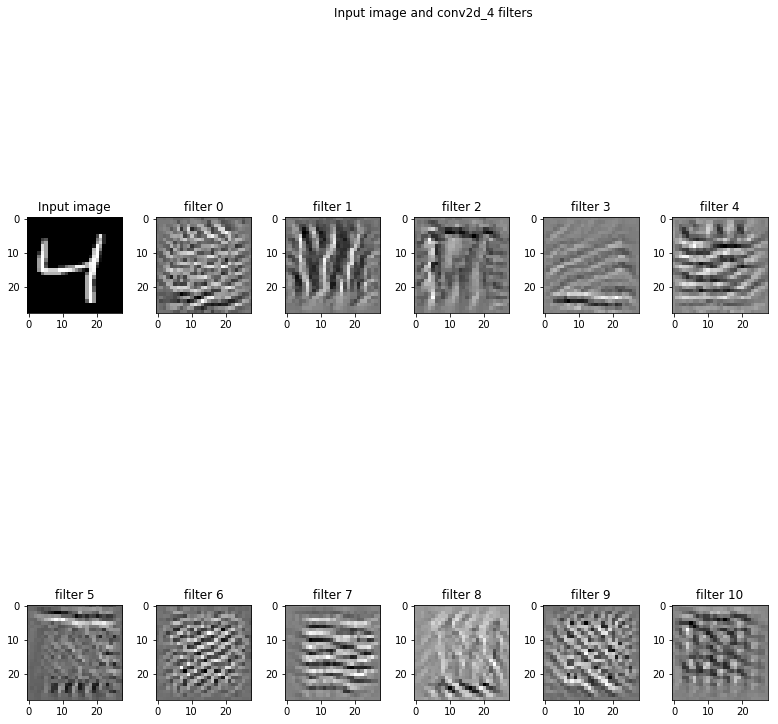

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_4'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()